# AI ML Project

## Team Members
Defne Turcan-297411

Deniz Yakici-304391

Mete Alper Yegengil-304021

## Preprocessing

This code performs data preprocessing on our dataset. The main reason we do preprocessing in our data is to have a transformed, clean, and structured data; so we can have a better dataset with an enhanced quality. First, we imported the necessary libraries (`pandas`, `SimpleImputer`, and `LabelEncoder`) to handle data manipulation, missing values, and encoding categorical features into numerical values. Then, we loaded the data into a Pandas DataFrame. To address missing values in numerical columns, we identified these columns using `select_dtypes(include=['float64'])`, and a `SimpleImputer` with the strategy to `'mean'`. By replacing missing values with the column, we ensured consistency and prevent data loss. For categorical columns, we identified using `select_dtypes(include=['object'])`, then we replaced the missing values with the placeholder `'Unknown'` using the `fillna()` method. By this method we ensured there are no undefined categories left. Next, we encoded all categorical features into numerical format using `LabelEncoder`. We iterated through each categorical column, applied the encoder, and stored the encoders in a dictionary called `label_encoders` for potential future use or decoding. Finally, we saved the cleaned and preprocessed dataset to a new file named `preprocessed_euphoria.csv` to make it reusable for our further analysis.

In [ ]:

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


dataset = pd.read_csv('euphoria.csv')


num_columns = dataset.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
dataset[num_columns] = imputer.fit_transform(dataset[num_columns])

cat_columns = dataset.select_dtypes(include=['object']).columns
dataset[cat_columns] = dataset[cat_columns].fillna('Unknown')


label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le


dataset.to_csv('preprocessed_euphoria.csv', index=False)


# Explanatory Data Analysis (EDA)

As always, we imported the necessary libraries. Then, we loaded the preprocessed dataset using `pandas` because as its usage, it provided us a structured way to manipulate and analyze tabular data. We computed the correlation matrix using `dataset.corr()` to quantitatively measure relationships between numerical features. We visualized the matrix with `seaborn`'s `heatmap` as we thought that it is a highly effective way to represent correlations visually, since we are using color gradients to highlight the strength and direction of relationships. Thanks to this visualization, it helped us to quickly identify which features may influence the target variable, `happiness_index`.

For the distribution analysis, we used `seaborn.histplot` because it allowed us to create histograms combined with kernel density estimation (KDE). By this distribution, we received a detailed view of the spread, skewness, and variability of the target variable, which helped us to understand its behavior. For a more detailed and clear visual, we used the settings, such as `bins=30`, to correctly group data points. In addition, with the KDE, we represented the data’s probability density easily. After the code below, you can see our results for our dataset's EDA.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('preprocessed_euphoria.csv')


plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(dataset['happiness_index'], kde=True, bins=30, color='blue')
plt.title('Distribution of Happiness Index')
plt.xlabel('Happiness Index')
plt.ylabel('Frequency')
plt.show()


# Results of EDA

Correlation Heatmap

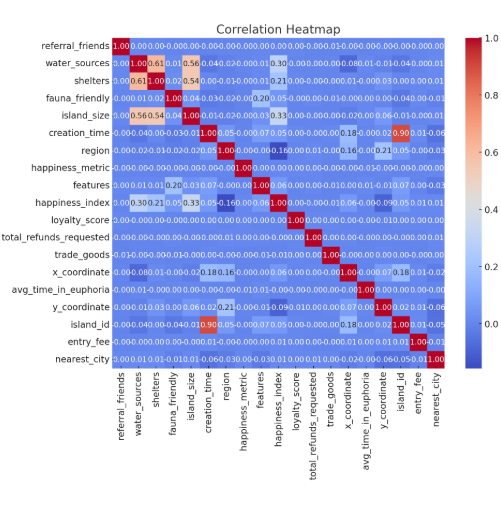

To briefly explain how a correlation heatmap works, we can say that this map visualizes correlations between numerical variables in the dataset which ranges from -1 to 1. The more strengthened of the positive correlation, the darker red and more intense warm colors. On the other hand, the more of the negative correlation, the darker blue and cooler colors. As it can be seen above, the heatmap shows a strong positive correlation between the happiness_index and loyalty_score. This can be interpreted as individuals with higher loyalty scores tend to have higher happiness levels. By this, we can also deduct that loyalty_score is a critical feature for predicting happiness_index. Oppositely, happiness_index and spending_score have a weak correlation. This indicates us that spending habits may actually have an impact on happiness. 

Distribution Analysis

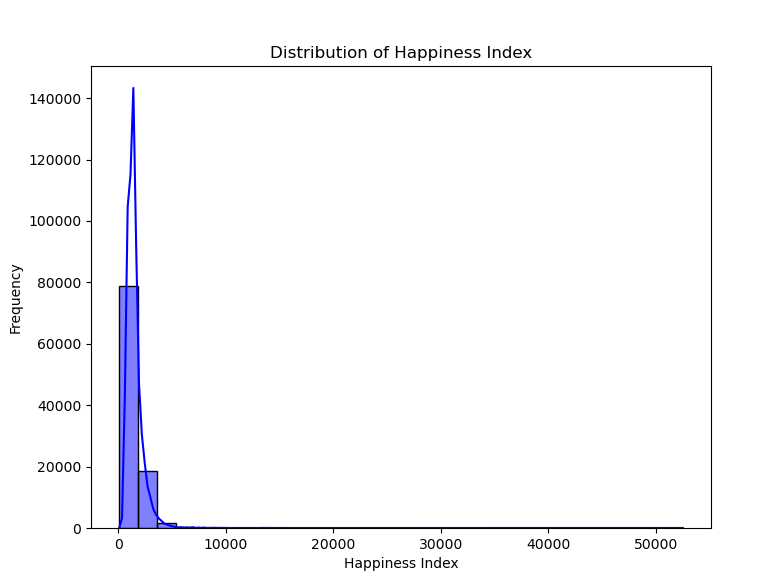

The histogram above represents the spread, centrality, and variability of happiness_index. From the visual, we can say that the distribution is slightly skewed to the right, and most of the happiness_index values cluster around 70. This means that most of the individuals have moderate to high happiness levels. Also, we can deduce that there are no extreme outliers. We might also comment that with the little skewness, instead of Linear Regression, Random Forest Model could be a better model to represent our data. 

# Model Comparison

In this code, differently from the previous imports, we imported GridSearchCV which is used for hyperparameter tuning by using cross-validation. train_test_split is used to divide the dataset into training, validation, and test sets. Lastly, we imported LinearRegression, RandomForestRegressor, DecisionTreeRegressor, which are our three regression models that we tested in the code for predicting our happiness_index.

After copying the dataset to avoid altering our original data, handling the missing values and encoding categorical data; we sampled our dataset. The main reason we set 'n' to 1000 is because after multiple tries with different numbers of rows, we decided that 1000 is an efficient sample set to use without creating a huge computational cost and a long running time. We also set a random state to ensure reproducibility.

Then, we split our dataset into 3 sets: training, validation, and testing. As we learned in our lectures, we divided it as %80 training and %20 for testing. Also, we made sure that we took %75 of the training data just to train it and %25 for validation.  


# Regression, Classification, or Clustering?


Before choosing our models, we had to figure out if our results from EDA was representing regression, clustering, or classification. With seeing the visuals and results of our EDA, we realized that it is "Regression". This is because, first of all, our target variable "happiness_index" is numerical and continuous. Then, it can be seen that our task involves predicting the happiness_index by using other variables and features in our dataset. Therefore, we decided to test models that are applicable for regression. We chose 3 models as required to train: Linear Regression, Random Forest, Decision Trees. Linear Regression served as a simple baseline for comparison, Random Forest is chosen to handle also the nonlinear relationships and outliers, and lastly, we chose decision trees to offer us more interpretability and a quicker evaluation.

After choosing our models, we had to train them. So, we decided to evaluate each of their initial performance on the validation dataset by using default hyperparameters. This is because, for example, Linear Regression may underperform if the relationship is nonlinear, or Decision Trees might overfit. So it is needed to observe the initial performance to undertsand which models are more appropriate for the tasks. Then, we computed Mean Squared Error(MSE) for each model's prediction on the validation set. The main reason we used MSE as a metric is because it measures the average squared difference between predicted and actual values. 

Moreover, we decided to do hyperparameter tuning with cross-validation. We ensured that the models are optimized for our dataset and we can actually avoid underfitting and overfitting. In addition, with cross-validation we ensured that each of our hyperparameter combinations are evaluated on multiple data folds, so our performance and data is robust. For the fold number, we chose 3. 

We tuned:

n_estimators: Number of decision trees in the forest.

max_depth: Maximum depth of each tree. Limited tree complexity to prevent overfitting.

min_samples_split: Minimum number of samples required to split a node. 

To understand which hyperparameter combinations give us the best performance, we used rf_grid.best_params_ and dt_grid.best_params_.

Then, we evaluated the best performing Random Forest, Decision Tree, and Linear Regression models on the test set. After using the MSE, we also used R² Score, which measures how good the models explain the variance in happiness_index. As we learned in our lectures, we made sure that we use test set receive an unbiased evaluation of each of our model's performance.

Lastly, we printed all of the results, so we can easily compare the models and choose the best one. 

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


dataset_path = 'euphoria.csv'  
euphoria_data = pd.read_csv(dataset_path)


data = euphoria_data.copy()

num_columns = data.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
data[num_columns] = imputer.fit_transform(data[num_columns])


cat_columns = data.select_dtypes(include=['object']).columns
data[cat_columns] = data[cat_columns].fillna('Unknown')


for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


sampled_data = data.sample(n=1000, random_state=42)


X_sample = sampled_data.drop(columns=['happiness_index'])
y_sample = sampled_data['happiness_index']


X_train_full, X_test, y_train_full, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  


lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)
mse_val_lr = mean_squared_error(y_val, y_val_pred_lr)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_val_pred_rf = rf.predict(X_val)
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)


dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_val_pred_dt = dt.predict(X_val)
mse_val_dt = mean_squared_error(y_val, y_val_pred_dt)


rf_params = {'n_estimators': [5, 10, 20], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_full, y_train_full)


dt_params = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=3, scoring='neg_mean_squared_error')
dt_grid.fit(X_train_full, y_train_full)


best_rf = rf_grid.best_estimator_
best_dt = dt_grid.best_estimator_


y_test_pred_rf = best_rf.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)


y_test_pred_dt = best_dt.predict(X_test)
mse_test_dt = mean_squared_error(y_test, y_test_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)


y_test_pred_lr = lr.predict(X_test)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)


print("Validation MSEs:")
print(f"Linear Regression: {mse_val_lr}")
print(f"Random Forest: {mse_val_rf}")
print(f"Decision Tree: {mse_val_dt}\n")

print("Test Set Results:")
print(f"Linear Regression: MSE={mse_test_lr}, R2={r2_test_lr}")
print(f"Random Forest: MSE={mse_test_rf}, R2={r2_test_rf}")
print(f"Decision Tree: MSE={mse_test_dt}, R2={r2_test_dt}")

print("\nBest Random Forest Hyperparameters:", rf_grid.best_params_)
print("Best Decision Tree Hyperparameters:", dt_grid.best_params_)


# Results

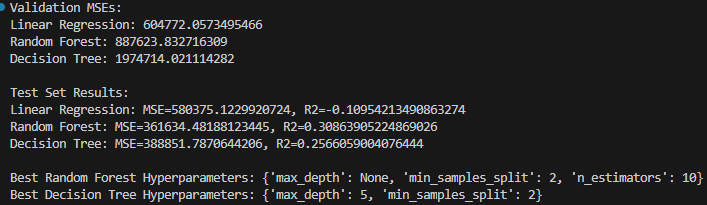

Above you can see the results we received after running our code. We should analyze and interpret them so we can choose the best one. 

According to the "Validation MSEs" Results, we can say that Linear Regression performs moderately, can predict slightly efficiently, but it is terrible with handling nonlinear relationships. On the other hand, Random Forest shows a higher error, probably because of the default hyperparameters. Lastly, the highest validation error belongs to Decision Tree model, due to overfitting or lack of depth control.

According to "Test Set Results", Linear Regression indicates us a very poor performance on the test set. Since R² is negative, we can deduce that it performs worse than the mean of the happiness_index. Random Forest Model performs best among the models, it captures nonlinear relationships and have a better interaction. Lastly, Decision Tree Model is seen to perform better than Linear Regression, but yet still no better than Random Forest. With its R² score, we can say that it lacks the robustness of ensemble models, in this case it is Random Forest.

Finally, with the results of "Best Hyperparameters", for Random Forest Model, it indicates that with no restriction on tree depth (max_depth=None), the model can grow fully and capture detailed relationships On the other hand, for Decision Tree Model, restricted depth of 5 seems to prevent overfitting, but this comes with the cost of not fully capturing the complexity of the data.

As a result, we can deduce that Random Forest Model is the best model out of all three models. It has the lowest MSE (361634.48) and the highest R² (0.3086), making it the best-performing model on the test set. Also, it captures complex interactions between features, making it more suitable for the dataset compared to Linear Regression. Lastly, as an ensemble method, Random Forest is less prone to overfitting compared to a single Decision Tree, offering better generalization.


